<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 


from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from numpy.random import RandomState
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.svm import LinearSVR


import warnings
warnings.filterwarnings("ignore")

RND = 12345

In [2]:
train_df = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_df = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_df = pd.read_csv('/datasets/gold_recovery_full_new.csv')
datasets = [train_df, test_df, full_df]

In [3]:
for data in datasets:
    print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
for data in datasets:
    print(data.duplicated().sum())

0
0
0


In [5]:
for data in datasets:
    print(data.head())

                  date  final.output.concentrate_ag  \
0  2016-01-15 00:00:00                     6.055403   
1  2016-01-15 01:00:00                     6.029369   
2  2016-01-15 02:00:00                     6.055926   
3  2016-01-15 03:00:00                     6.047977   
4  2016-01-15 04:00:00                     6.148599   

   final.output.concentrate_pb  final.output.concentrate_sol  \
0                     9.889648                      5.507324   
1                     9.968944                      5.257781   
2                    10.213995                      5.383759   
3                     9.977019                      4.858634   
4                    10.142511                      4.939416   

   final.output.concentrate_au  final.output.recovery  final.output.tail_ag  \
0                    42.192020              70.541216             10.411962   
1                    42.701629              69.266198             10.462676   
2                    42.657501              68.

In [6]:
for data in datasets:
    print(data.describe())

       final.output.concentrate_ag  final.output.concentrate_pb  \
count                 14148.000000                 14148.000000   
mean                      5.142034                    10.132960   
std                       1.369586                     1.654930   
min                       0.000000                     0.000000   
25%                       4.211620                     9.297355   
50%                       4.994652                    10.297144   
75%                       5.859540                    11.170603   
max                      16.001945                    17.031899   

       final.output.concentrate_sol  final.output.concentrate_au  \
count                  13938.000000                 14149.000000   
mean                       9.202849                    44.003792   
std                        2.790516                     4.905261   
min                        0.000000                     0.000000   
25%                        7.484645                    4

In [7]:
#Признаки в трейне, которых нет в тесте
missed_test = set(train_df.columns) - set(test_df.columns)
print(f'Кол-во отсутствующих признаков -', len(test_df.dtypes))

Кол-во отсутствующих признаков - 53


В тесте отсутвуют признаки output, т.к. они целевые    
В тесте отсуствуют признаки calculation для этапа rougher, возможно, эти данные рассчитаем позднее.        

In [8]:
missed_test

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В этих столбцах указаны состояния продуктов после этапов флотации и очистки, и целевые значения эффективности обогащения.

• В данных есть пропуски      
• У столбца date неверный тип

In [9]:
test_df = test_df.merge(full_df.loc[:, ['date','rougher.output.recovery','final.output.recovery']], on='date')

In [10]:
train_df['date'] = pd.to_datetime(train_df['date'], format='%Y-%m-%d %H:%M:%S')
train_df.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

In [11]:
test_df['date'] = pd.to_datetime(test_df['date'], format='%Y-%m-%d %H:%M:%S')
test_df.dtypes

date                                          datetime64[ns]
primary_cleaner.input.sulfate                        float64
primary_cleaner.input.depressant                     float64
primary_cleaner.input.feed_size                      float64
primary_cleaner.input.xanthate                       float64
primary_cleaner.state.floatbank8_a_air               float64
primary_cleaner.state.floatbank8_a_level             float64
primary_cleaner.state.floatbank8_b_air               float64
primary_cleaner.state.floatbank8_b_level             float64
primary_cleaner.state.floatbank8_c_air               float64
primary_cleaner.state.floatbank8_c_level             float64
primary_cleaner.state.floatbank8_d_air               float64
primary_cleaner.state.floatbank8_d_level             float64
rougher.input.feed_ag                                float64
rougher.input.feed_pb                                float64
rougher.input.feed_rate                              float64
rougher.input.feed_size 

In [12]:
full_df['date'] = pd.to_datetime(full_df['date'], format='%Y-%m-%d %H:%M:%S')
full_df.dtypes

date                                          datetime64[ns]
final.output.concentrate_ag                          float64
final.output.concentrate_pb                          float64
final.output.concentrate_sol                         float64
final.output.concentrate_au                          float64
                                                   ...      
secondary_cleaner.state.floatbank5_a_level           float64
secondary_cleaner.state.floatbank5_b_air             float64
secondary_cleaner.state.floatbank5_b_level           float64
secondary_cleaner.state.floatbank6_a_air             float64
secondary_cleaner.state.floatbank6_a_level           float64
Length: 87, dtype: object

In [13]:
train_df = train_df.drop('date', axis=1)
test_df = test_df.drop('date', axis=1)

In [14]:
train_df[train_df['final.output.concentrate_pb'].isna()].head(5)

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2869,NaN,NaN,10.188231,29.020814,63.725335,7.387115,2.072266,16.982505,2.908215,83.915221,...,8.985634,-548.815307,7.011665,-537.231749,8.031238,-550.028193,5.984399,-549.63625,18.01224,-551.325271


Проверим кол-во явных дубликатов

In [15]:
count = 0
for data in datasets:
    count += 1
    print(f'\nКоличество явных дубликатов в {count}-м датасете - ', data.duplicated().sum())


Количество явных дубликатов в 1-м датасете -  0

Количество явных дубликатов в 2-м датасете -  0

Количество явных дубликатов в 3-м датасете -  0


In [16]:
#Избавимся от пропусков
shape_train_df_before = train_df.shape
shape_test_df_before = test_df.shape
shape_full_df_before = full_df.shape
train_df = train_df.ffill(axis=0)
test_df = test_df.ffill(axis=0)
full_df = full_df.ffill(axis=0)
print(f'\nРазмер тренировочной выборки - {shape_train_df_before} и количество строк без пропусков - {len(train_df.notna())}')
print(f'\nРазмер тестовой выборки - {shape_test_df_before} и количество строк без пропусков - {len(test_df.notna())}')
print(f'\nРазмер исходной выборки - {shape_full_df_before} и количество строк без пропусков - {len(full_df.notna())}')


Размер тренировочной выборки - (14149, 86) и количество строк без пропусков - 14149

Размер тестовой выборки - (5290, 54) и количество строк без пропусков - 5290

Размер исходной выборки - (19439, 87) и количество строк без пропусков - 19439


In [17]:
print('\nКоличество отсутствующих признаков -', len(missed_test))


Количество отсутствующих признаков - 34


Проверка формулы эффективности обогащения на обучающей выборке для признака rougher.output.recovery     

recovery = ((C(F-T))/(FC-T))*100%, где:    
С - доля золота концентрате после фильтрации/очитски     
F - доля золота в сырье/концентрате до флотации/очистки    
T - доля золота в отвальных хвостах после фильтрации/очистки    

C - rougher.output.concentrate_au    
F - rougher.input.feed_au    
T - rougher.output.tail_au    
Значение нужного признака - rougher.output.recovery    

Проверим расчет recovery в train:    
•  Вычислим recovery из сырых значений, проверим сколько из них совпало с предоставленными    
•  Вычислим MAE для рассчитанных значений и исходых 

In [18]:
c = train_df['rougher.output.concentrate_au']
f = train_df['rougher.input.feed_au']
t = train_df['rougher.output.tail_au']
recovery = ((c*(f-t))/(f*(c-t))) * 100

In [19]:
#MAE покажет как сильно предсказания отличаются от истинных значений
print(f'MAE -', mean_absolute_error(train_df['rougher.output.recovery'], recovery))

MAE - 9.73512347450521e-15


Полученное значение говорит о том, что рассчеты верны

## Анализ данных

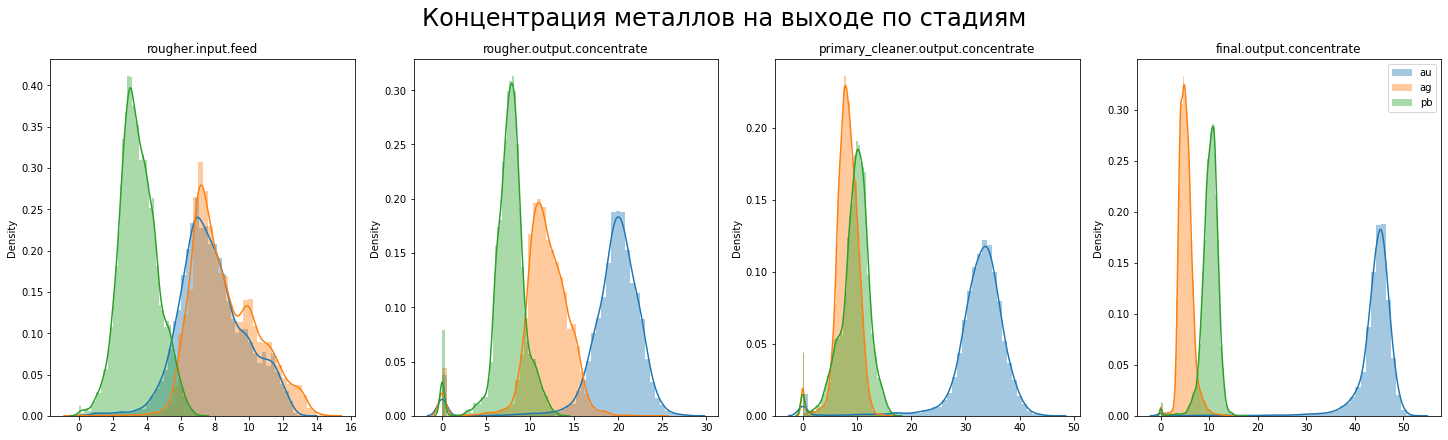

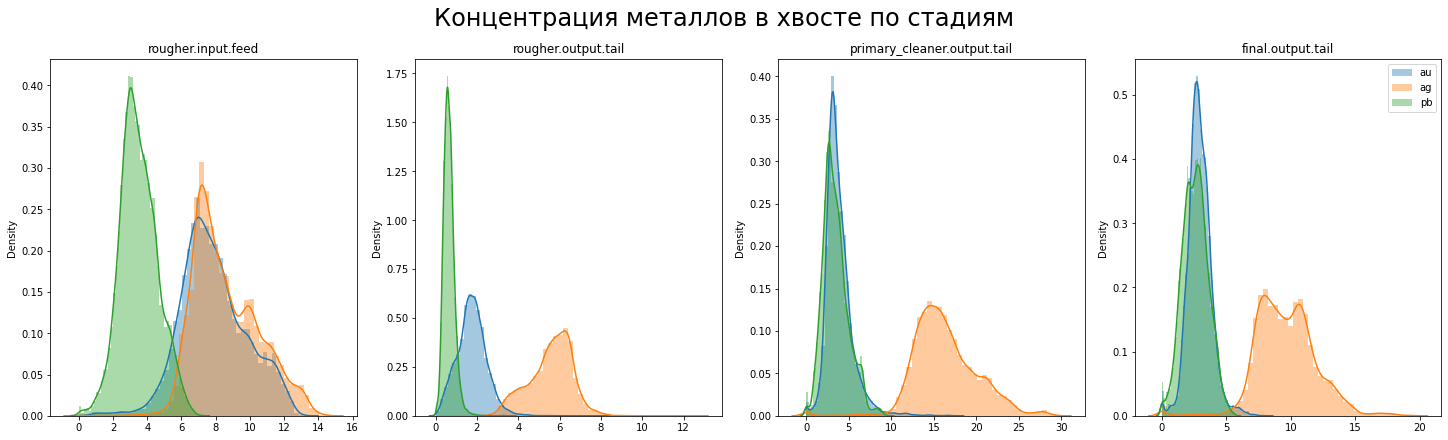

In [20]:
process = ['rougher.input.feed',
           'rougher.output.concentrate',
           'primary_cleaner.output.concentrate',
           'final.output.concentrate']

process_tail = ['rougher.input.feed',
                'rougher.output.tail',
                'primary_cleaner.output.tail',
                'final.output.tail']

metals = ['au', 'ag', 'pb']

fig, axs = plt.subplots(1, len(process), figsize=(20, 6), constrained_layout=True)
fig.suptitle('Концентрация металлов на выходе по стадиям', fontsize=24)

for stage, ax in zip(process, axs):
    ax.set_title(stage)
    for metal in metals:        
        cols = train_df.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(train_df.loc[:, cols].dropna(), label=metal, ax=ax)    
plt.legend()

fig, axs = plt.subplots(1, 4, figsize=(20, 6), constrained_layout=True)
fig.suptitle('Концентрация металлов в хвосте по стадиям', fontsize=24)

for stage, ax in zip(process_tail, axs):
    ax.set_title(stage)
    for metal in metals:        
        cols = train_df.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(train_df.loc[:, cols].dropna(), label=metal, ax=ax)   
plt.legend()

plt.show()

• В процессе очистки, концентрация металла возрастает     
• Большое кол-во нулевых значений    

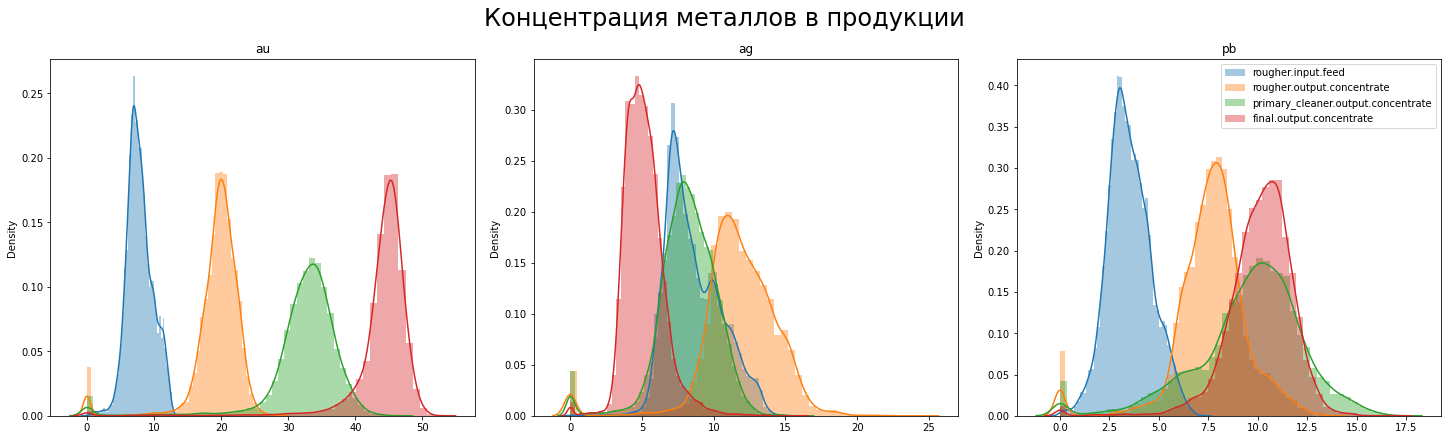

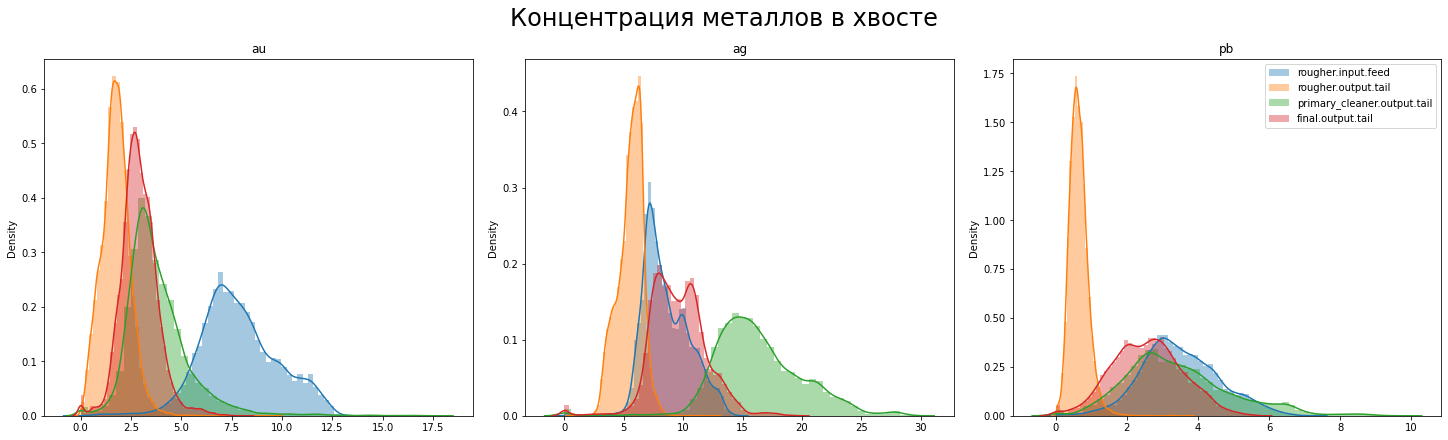

In [21]:
# Концентрация металлов на выходе и в хвосте для разных процессов
fig, axs = plt.subplots(1, len(metals), figsize=(20, 6), constrained_layout=True)
fig.suptitle('Концентрация металлов в продукции', fontsize=24)

for metal, ax in zip(metals, axs):
    ax.set_title(metal)
    for stage in process:
        cols = train_df.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(train_df.loc[:, cols].dropna(), label=stage, ax=ax)   
plt.legend()

fig, axs = plt.subplots(1, len(metals), figsize=(20, 6), constrained_layout=True)
fig.suptitle('Концентрация металлов в хвосте', fontsize=24)

for metal, ax in zip(metals, axs):
    ax.set_title(metal)
    for stage in process_tail:
        cols = train_df.columns.str.contains(stage+'_'+metal)
        sns_ax = sns.distplot(train_df.loc[:, cols].dropna(), label=stage, ax=ax)   
plt.legend()

plt.show()

• По мере очистки растет концентрация золота    
• Наибольшая концентрация золота в хвосте после флотации    


In [22]:
#Посчитаем распределение гранул сырья
def show_feed_size_hist(step, title):
    x0 = train_df[f'{step}.input.feed_size'].dropna()
    x1 = test_df[f'{step}.input.feed_size'].dropna()
    plt.figure(figsize=(13, 6))
    sns.distplot(x0, kde_kws = {"label":"Train"})
    sns.distplot(x1, kde_kws = {"label":"Test"})
    plt.xlabel('Размер гранул')
    plt.ylabel('Количество наблюдений')
    plt.title(label=f'Распределение размеров гранул сырья для {title}', fontsize=15)
    plt.legend()

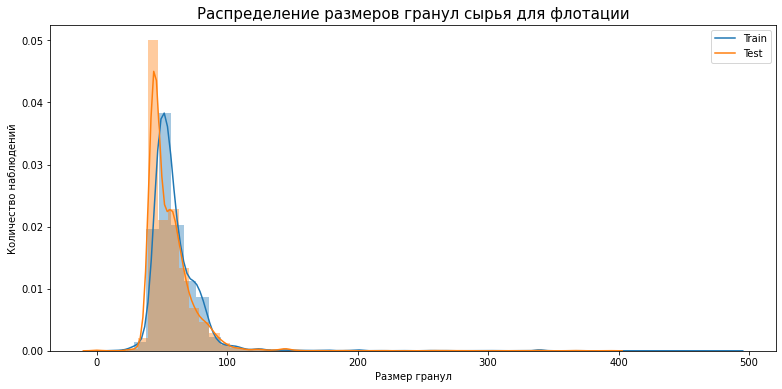

In [23]:
show_feed_size_hist('rougher', 'флотации')

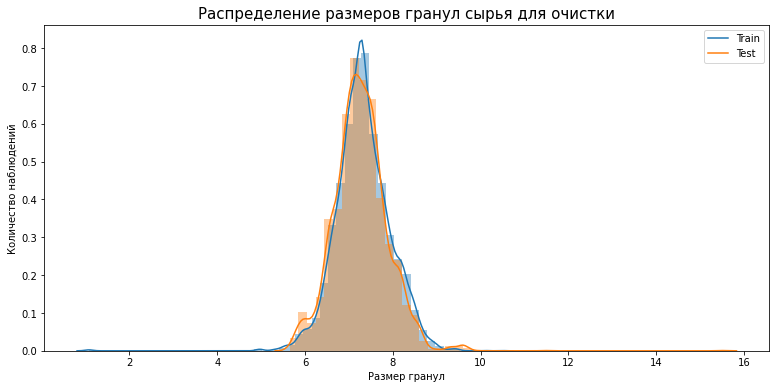

In [24]:
show_feed_size_hist('primary_cleaner', 'очистки')

Размеры гранул распределены одинаково на двух выборках

# Посчитаем суммарную концентрацию всех веществ на этапах очистки

In [25]:
metals = ['au', 'ag', 'pb', 'sol']
stages = ['rougher.input.feed_',
         'rougher.output.concentrate_', 
         'final.output.concentrate_']

for stage in stages:
    full_df[stage] = full_df[stage + metals[0]] + full_df[stage + metals[1]] + full_df[stage + metals[2]] + full_df[stage + metals[3]]


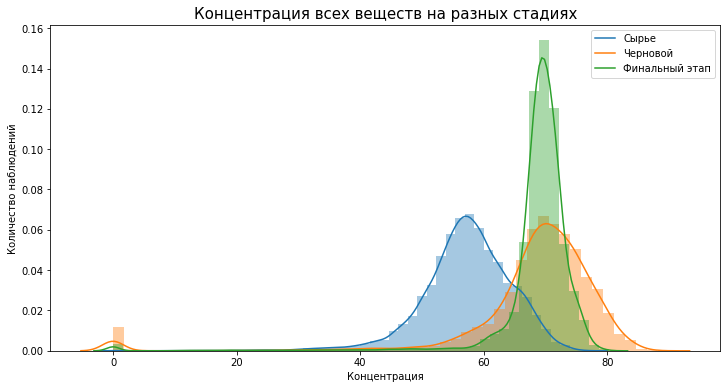

In [26]:
x0 = full_df['rougher.input.feed_'].dropna()
x1 = full_df['rougher.output.concentrate_'].dropna()
x2 = full_df['final.output.concentrate_'].dropna()

plt.figure(figsize=(12, 6))

sns.distplot(x0, kde_kws= {"label": "Сырье"})
sns.distplot(x1, kde_kws= {"label": "Черновой"})
sns.distplot(x2, kde_kws= {"label": "Финальный этап"})


plt.xlabel('Концентрация')
plt.ylabel('Количество наблюдений')
plt.title(label='Концентрация всех веществ на разных стадиях', fontsize=15)
plt.legend()

После флотации увеличивается концентрация веществ

In [27]:
train_df = train_df[(train_df['rougher.output.concentrate_au'] != 0) & (train_df['rougher.output.concentrate_ag'] != 0) & (train_df['rougher.output.concentrate_pb'] != 0) & (train_df['rougher.output.concentrate_sol'] != 0)]
train_df = train_df[(train_df['final.output.concentrate_au'] != 0) & (train_df['final.output.concentrate_ag'] != 0) & (train_df['final.output.concentrate_pb'] != 0) & (train_df['final.output.concentrate_sol'] != 0)]

full_df = full_df[(full_df['rougher.output.concentrate_au'] != 0) & (full_df['rougher.output.concentrate_ag'] != 0) & (full_df['rougher.output.concentrate_pb'] != 0) & (full_df['rougher.output.concentrate_sol'] != 0)]
full_df = full_df[(full_df['final.output.concentrate_au'] != 0) & (full_df['final.output.concentrate_ag'] != 0) & (full_df['final.output.concentrate_pb'] != 0) & (full_df['final.output.concentrate_sol'] != 0)]

## Модель

sMAPE     
• target_rougher - целевой признак(эффективность обогащения чернового концентрата)        
• predict_rougher - предсказание эффективности обогащения чернового концентрата    
• target_final - целевой признак(эффективность обогащения финального концентрата)     
• predict_final - предсказание эффективности обогащения финального концентрата     

In [40]:
signs_for_delete_without_target_signs = missed_test - set(['rougher.output.recovery','final.output.recovery'])
signs_for_delete_without_target_signs

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.tail_pb',
 'rougher.output.tail_sol',
 'secondary_cleane

In [41]:
print('\nКоличество признаков для удаления из тренировочной выборки -', len(signs_for_delete_without_target_signs))


Количество признаков для удаления из тренировочной выборки - 32


In [42]:
train_df = train_df.drop(columns=signs_for_delete_without_target_signs, axis=1)

In [43]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13792 entries, 0 to 14148
Data columns (total 54 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   final.output.recovery                       13792 non-null  float64
 1   primary_cleaner.input.sulfate               13792 non-null  float64
 2   primary_cleaner.input.depressant            13792 non-null  float64
 3   primary_cleaner.input.feed_size             13792 non-null  float64
 4   primary_cleaner.input.xanthate              13792 non-null  float64
 5   primary_cleaner.state.floatbank8_a_air      13792 non-null  float64
 6   primary_cleaner.state.floatbank8_a_level    13792 non-null  float64
 7   primary_cleaner.state.floatbank8_b_air      13792 non-null  float64
 8   primary_cleaner.state.floatbank8_b_level    13792 non-null  float64
 9   primary_cleaner.state.floatbank8_c_air      13792 non-null  float64
 10  primary_cl

In [44]:
def get_smape(target, predict):
    smape = (1/len(target))*np.sum((np.abs(target - predict))/( (np.abs(target)+np.abs(predict))/2))*100
    return smape

In [45]:
smape_scorer = make_scorer(get_smape, greater_is_better = False)

In [46]:
def get_final_smape(rougher, final):
    final = 0.25*rougher+0.75*final
    return final

In [47]:
features_for_train_df = train_df.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_train_df = train_df['rougher.output.recovery']
target_for_final_on_train_df = train_df['final.output.recovery']

In [48]:
dct_with_scores = {}

In [49]:
%%time
model_lr_rougher = LinearRegression(normalize=True)
smape_rougher = cross_val_score(model_lr_rougher,
                          features_for_train_df,
                          target_for_rougher_on_train_df,
                          scoring=smape_scorer,
                          cv=5)
final_smape_rougher = smape_rougher.mean()
model_lr_final = LinearRegression(normalize=True)
smape_final = cross_val_score(model_lr_final,
                        features_for_train_df,
                        target_for_final_on_train_df,
                        scoring=smape_scorer,
                        cv=5)

final_smape_final = smape_final.mean()
result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
dct_with_scores['LR'] = [result_smape]

CPU times: user 744 ms, sys: 1.51 s, total: 2.26 s
Wall time: 2.21 s


In [50]:
%%time
best_result_for_dt = 100
best_param_for_dt = 0
for n in range(1, 10, 1):
    model_dt_rougher = DecisionTreeRegressor(max_depth=n, random_state=RND)
    smape_rougher = cross_val_score(model_dt_rougher,
                              features_for_train_df,
                              target_for_rougher_on_train_df,
                              scoring=smape_scorer,
                              cv=5)
    final_smape_rougher = smape_rougher.mean()

    model_dt_final = DecisionTreeRegressor(max_depth=n, random_state=RND)
    smape_final = cross_val_score(model_dt_final, 
                                  features_for_train_df,
                                  target_for_final_on_train_df,
                                  scoring=smape_scorer,
                                  cv=5)
    final_smape_final = smape_final.mean()
    result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
    if result_smape < best_result_for_dt:
        best_result_for_dt = result_smape
        best_param_for_dt = n
dct_with_scores['DT'] = [best_result_for_dt, best_param_for_dt]

CPU times: user 21.8 s, sys: 271 ms, total: 22.1 s
Wall time: 22.1 s


In [51]:
%%time
best_model_for_rf = 100
best_param_for_rf = 0
for n in range(10, 100, 30):
    for d in range(2,10,2):
        model_rf_rougher = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=RND)
        smape_rougher = cross_val_score(model_rf_rougher,
                                  features_for_train_df,
                                  target_for_rougher_on_train_df,
                                  scoring=smape_scorer,
                                  cv=5)
        final_smape_rougher = smape_rougher.mean()

        model_rf_final = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=RND)
        smape_final = cross_val_score(model_rf_final,
                                features_for_train_df,
                                target_for_final_on_train_df,
                                scoring=smape_scorer,
                                cv=5)
        final_smape_final = smape_final.mean()
        result_smape = get_final_smape(final_smape_rougher, final_smape_final)*(-1)
        if result_smape < best_model_for_rf:
            best_model_for_rf = result_smape
            best_param_for_rf = [n,d]
dct_with_scores['RF'] = [best_model_for_rf, best_param_for_rf]

CPU times: user 11min 59s, sys: 668 ms, total: 12min
Wall time: 12min 1s


In [52]:
print(dct_with_scores)

{'LR': [10.059261443482775], 'DT': [8.925785452030949, 3], 'RF': [8.529258429567625, [10, 4]]}


In [53]:
for key in dct_with_scores.keys():
    print(f'\nМОДЕЛЬ {str(key).upper()} С РЕЗУЛЬТАТОМ - {dct_with_scores[key][0]}')


МОДЕЛЬ LR С РЕЗУЛЬТАТОМ - 10.059261443482775

МОДЕЛЬ DT С РЕЗУЛЬТАТОМ - 8.925785452030949

МОДЕЛЬ RF С РЕЗУЛЬТАТОМ - 8.529258429567625


Лучшая модель - Random Forest Regressor      
Используем ее для тестовой выборки     

In [54]:
print('\nЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ МОДЕЛИ RF: N_ESTIMATORS - {}, MAX_DEPTH - {}'.format(dct_with_scores['RF'][1][0], dct_with_scores['RF'][1][1]))


ЛУЧШИЕ ПАРАМЕТРЫ ДЛЯ МОДЕЛИ RF: N_ESTIMATORS - 10, MAX_DEPTH - 4


In [55]:
features_for_test_df = test_df.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_for_rougher_on_test_df = test_df['rougher.output.recovery']
target_for_final_on_test_df = test_df['final.output.recovery']

In [56]:
model_for_test_rougher = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=RND)
model_for_test_rougher.fit(features_for_train_df, target_for_rougher_on_train_df)
predicted_rougher = model_for_test_rougher.predict(features_for_test_df)

model_for_test_final = RandomForestRegressor(n_estimators=10, max_depth=4, random_state=RND)
model_for_test_final.fit(features_for_train_df, target_for_final_on_train_df)
predicted_final = model_for_test_final.predict(features_for_test_df)

smape_for_test_rougher = get_smape(target_for_rougher_on_test_df, predicted_rougher)
smape_for_test_final = get_smape(target_for_final_on_test_df, predicted_final)
final_smape_for_test = get_final_smape(smape_for_test_rougher, smape_for_test_final)

In [57]:
print(f'\nSMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТАВЛЯЕТ - {final_smape_for_test}')


SMAPE ДЛЯ ТЕСТОВОЙ ВЫБОРКИ СОСТАВЛЯЕТ - 9.711643135703492


Проверим полученную модель на адекватность

In [58]:
dummy_regr_for_rougher = DummyRegressor(strategy="mean")
dummy_regr_for_final = DummyRegressor(strategy="mean")

dummy_regr_for_rougher.fit(features_for_train_df, target_for_rougher_on_train_df)
dummy_regr_for_final.fit(features_for_train_df, target_for_final_on_train_df)

dummy_predicted_rougher = dummy_regr_for_rougher.predict(features_for_test_df)
dummy_predicted_final = dummy_regr_for_final.predict(features_for_test_df)

smape_for_const_rougher = get_smape(target_for_rougher_on_test_df, dummy_predicted_rougher)
smape_for_const_final = get_smape(target_for_final_on_test_df, dummy_predicted_final)

final_smape_for_const = get_final_smape(smape_for_const_rougher, smape_for_const_final)

In [59]:
print(f'\nПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - {final_smape_for_const}')


ПОКАЗАТЕЛЬ SMAPE ДЛЯ КОНСТАНТНОЙ МОДЕЛИ - 9.82146839182027


Модель проверена на адекватность, ее показатель SMAPE выше показателя константной модели

# Вывод

• Лучшая модель - Random Forest Regressor     
• Модель адекватна. Ее показатель SMAPE намного меньше чем показатель константной модели  
• Были удалены аномальные значения

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке выполнения
- [x]  Выполнен шаг 1: данные подготовлены
    - [x]  Проверена формула вычисления эффективности обогащения
    - [x]  Проанализированы признаки, недоступные в тестовой выборке
    - [x]  Проведена предобработка данных
- [x]  Выполнен шаг 2: данные проанализированы
    - [x]  Исследовано изменение концентрации элементов на каждом этапе
    - [x]  Проанализированы распределения размеров гранул на обучающей и тестовой выборках
    - [x]  Исследованы суммарные концентрации
- [x]  Выполнен шаг 3: построена модель прогнозирования
    - [x]  Написана функция для вычисления итогового *sMAPE*
    - [x]  Обучено и проверено несколько моделей
    - [x]  Выбрана лучшая модель, её качество проверено на тестовой выборке